# 1. Perceptron

In this lab, we will be implementing Perceptron using Scikit-Learn. We will be using Breast Cancer dataset that contains features computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image.

### 1.1 Input Data

Importing standard modules and the dataset.

In [1]:
# Import the standard modules to be used in this lab
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

The dataset is available is sklearn. So we have to import the dataset into our program and store it in a variable called cancer.

In [2]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

Let’s explore the dataset to get some insight. The object ```cancer``` is a dictionary (data structure), thus we can explore the keys of this dictionary.

In [3]:
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

The keys allows us to access the data in the dictionary. For example, ‘feature_names’ allows us to display the feature names of the dataset. ‘data’ : the data of the dataset ‘target’ : the classification target ‘feature_name’ : feature names of the dataset ‘DESCR’ : full description of the dataset

You may use the ```describe``` and ```info``` methodto understand the dataset.

In [4]:
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [5]:
print(cancer.feature_names)
print(cancer.data.shape)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
(569, 30)


Now let's convert ```cancer.data``` into Pandas Dataframe.

In [6]:
cancer_pd = pd.DataFrame(cancer.data)
cancer_pd.columns = cancer.feature_names
cancer_pd['target'] = cancer.target
cancer_pd.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


As you can see there are 30 columns (feature variables) and 1 target variable. <br>
Let’s plot a few features to observe their distribution. As we can see, a linear classifier will not be able to perfectly separate the data points.

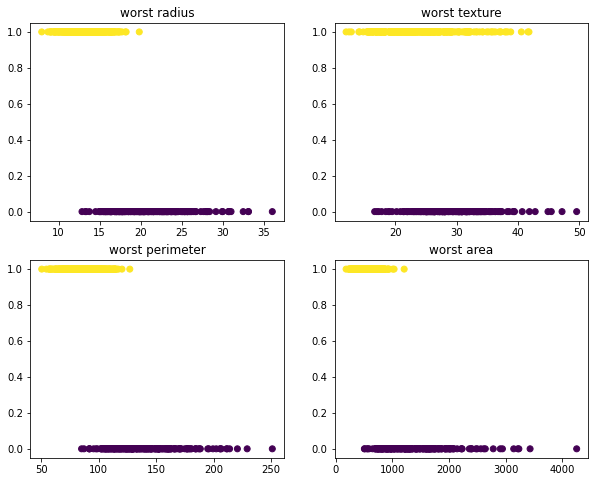

In [7]:
%matplotlib inline
from matplotlib import pyplot as plt

cols = cancer_pd.columns[20:24]
figs, axes = plt.subplots(2, 2, figsize=(10,8))
axes = axes.ravel() # flatten the numpy array
for p in range(0,4):
    axes[p].scatter(cancer_pd[cols[p]], cancer_pd['target'], c=cancer_pd['target'])
    axes[p].set_title(cols[p])

Here we plot feature ```mean radius``` against ```mean compactness```

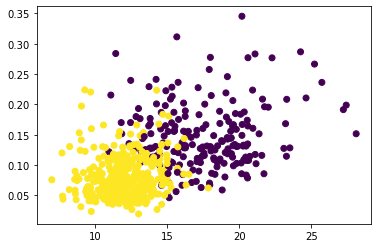

In [8]:
plt.scatter(cancer_pd['mean radius'], cancer_pd['mean compactness'], c=cancer_pd['target'])

Let's build a predictive model to classify the dataset. We use two features only to predict the target variable. We split the dataset into training and test sets. A validation set is not created since we are building only one model.

In [9]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
y = cancer_pd['target'].values
X = cancer_pd[['mean radius', 'mean compactness']]
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=100)
print(X_train.shape)

(426, 2)


### 1.2 Perceptron Classifier

A perceptron classifier can be built by importing SGDClassifier module. Here we need to specify the following parameters: <ul> <li> ```loss``` function is set to 'perceptron'</li><li>```eta0``` is the value of the learning rate which should be 1 </li> <li> ```learning rate``` is set to constant which means the value will not be changing </li> <li> ```penalty``` is none </li><li>```max_iter``` is the maximum number of epochs </li>

We can also build a perceptron classifier using ```Perceptron``` module: ```import sklearn.linear_model.Perceptron```.

In [10]:
from sklearn.linear_model import SGDClassifier
model_pcpt = SGDClassifier(loss='perceptron', eta0=1, learning_rate='constant', penalty=None, max_iter=200, random_state=100)
model_pcpt.fit(X_train, y_train)

SGDClassifier(eta0=1, learning_rate='constant', loss='perceptron', max_iter=200,
              penalty=None, random_state=100)

Let's evaluate the performance of the model by predicting the test set.

In [12]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
y_pred = model_pcpt.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.8671328671328671
[[37 19]
 [ 0 87]]
              precision    recall  f1-score   support

           0       1.00      0.66      0.80        56
           1       0.82      1.00      0.90        87

    accuracy                           0.87       143
   macro avg       0.91      0.83      0.85       143
weighted avg       0.89      0.87      0.86       143



Let's plot the decision boundary of the Perceptron classifier.

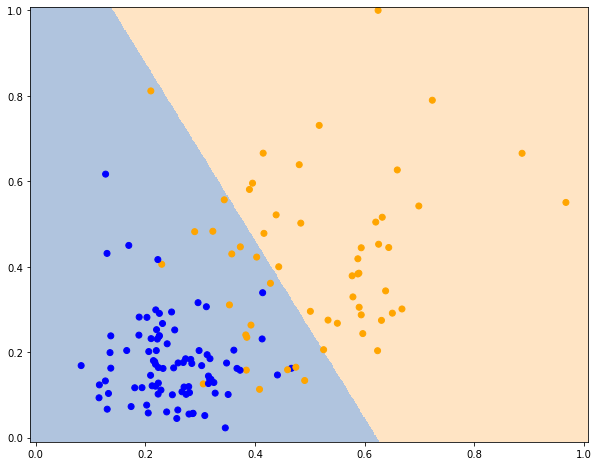

In [18]:
from matplotlib.colors import ListedColormap
cmap_regions = ListedColormap(['bisque', 'lightsteelblue'])
cmap_points = ListedColormap(['orange', 'blue'])
offset = 0.01
step = 0.002
x1_min, x1_max = X[:,0].min() - offset, X[:,0].max() + offset
x2_min, x2_max = X[:,1].min() - offset, X[:,1].max() + offset
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, step), np.arange(x2_min, x2_max, step))
Z = model_pcpt.predict(np.c_[xx1.ravel(), xx2.ravel()])
Z = Z.reshape(xx1.shape)
plt.figure(figsize=(10,8))
plt.contourf(xx1, xx2, Z, cmap=cmap_regions)
plt.scatter(X_test[:,0], X_test[:,1], c=y_test, cmap=cmap_points)